# Effects of a heuristic k-mer threshold

## Basics

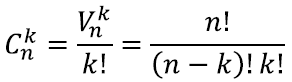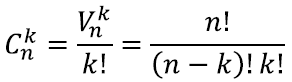

In [8]:
from math import factorial

# how many error combinations for e errors in a sequence of length n
def error_distribution_count(n, e):
    return int(factorial(n) / (factorial(n - e) * factorial(e)))

# minimum length of k-mer that does not appear spuriously in this reference
def min_k(ref_len):
    z = 4 #alphabet size
    for k in range(30):
        if (z**k > ref_len):
            return k

def kmer_count(k, n):
    return n - k + 1

def kmer_lemma_threshold(k, n, e):
    return kmer_count(k, n) - (k * e)

In [9]:
error_distribution_count(50, 5)

2118760

In [10]:
min_k(3e9)

16

In [11]:
kmer_lemma_threshold(16, 50, 5)

-45

## Recursion from Knut

Finding the number (or fraction) of cases where all shared k-mers would be destroyes

In [12]:
# how many error distributions would destroy all shared k-mers
def f(k, n, e):
    if(e == 0):
        return (1 if (n < k) else 0) # if (n < k) no shared k-mers
        
    sum = 0
    for err_pos in range(1, k + 1):
        sum += f(n - err_pos, k, e - 1)
    return sum

def missed_case_rate(k, n, e):
    print("Probability of " + str(e) + " errors destroying all " + str(k) + "-mers in " + str(n) + "bp sequence")
    return round(f(k, n, e) / error_distribution_count(n, e), 3)

In [13]:
missed_case_rate(16, 50, 5)

Probability of 5 errors destroying all 16-mers in 50bp sequence


0.049

## Visualise error distributions

In [14]:
def print_error_dist(n, err_list):
    j = 0
    for i in range(1, n + 1):
        if (j < len(err_list)):
            err_pos = err_list[j]
            if (i != err_pos):
                print("A", end = '')
            else:
                print("x", end = '')
                j += 1
        else:
            print("A", end = '')
    print()

## Find all error distributions

### Closed formula for all possible error configurations

In [15]:
# for a given number of errors and sequence length
# return a table with e rows
# row i are the starting positions for error e counted from the left
def make_err_pos_list_list(n, e):
    pos_list_list = []
    for first_pos in range(1, e + 1):
        pos_list_list.append(list(range(first_pos, n + 1 - e + first_pos)))
    
    return pos_list_list

In [16]:
#Example for e = 2 and n = 3
#[[1, 2] the first error can be at position 1 or 2 
#[2, 3]] the second error can be at position 2 or 3
make_err_pos_list_list(3, 2)

[[1, 2], [2, 3]]

In [31]:
import itertools

def is_sorted(x, key = lambda x: x): 	
    return all([key(x[i]) <= key(x[i + 1]) for i in range(len(x) - 1)])

def make_err_distributions(n, e):
    pos_list_list = make_err_pos_list_list(n, e)
    combinations = list(itertools.product(*pos_list_list))

    err_list_list = []
    for err_list in combinations:
        if len(err_list) == len(set(err_list)) and is_sorted(err_list):
            err_list_list.append(err_list)

    return err_list_list

In [35]:
print(make_err_distributions(5, 2))
print(len(make_err_distributions(5, 2)) == error_distribution_count(5, 2))

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
True


In [62]:
def remaining_kmers(n, k, err_list):
    kmer_count = 0
    if (err_list[0]) > k:
        kmer_count += err_list[0] - k + 1
    for i in range(len(err_list) - 1):
        if (err_list[i+1] - err_list[i]) > k:
            kmer_count += err_list[i+1] - err_list[i] - k + 1
    if (n - err_list[-1]) >= k:
        kmer_count += n - err_list[-1] - k + 1
    return kmer_count

In [64]:
n = 20
e = 5
err_list_list = make_err_distributions(n, e)
total_count = len(err_list_list)
print(str(e) + " errors can be configured in " + str(total_count) + " ways on a sequence of length " + str(n))

5 errors can be configured in 15504 ways on a sequence of length 20


In [65]:
k = 3
for threshold in range(1, 5):
    true_count = 0
    for err_list in err_list_list:
        if remaining_kmers(n, k, err_list) >= threshold:
            true_count += 1
        else:
            print(err_list)

    print("min length\t" + str(n))
    print("error count\t" + str(e))
    print("k-mer length\t" + str(k))
    print("kmer-lemma\t" + str(kmer_lemma_threshold(k, n, e)))
    print("threshold\t" + str(threshold))

    if (true_count > 0):
        print("FN\t" + str(round(100 - (true_count / total_count) * 100, 2)) + "%")
    else:
        print("FN\t100%")


min length	20
error count	5
k-mer length	3
kmer-lemma	3
threshold	1
FN	0.0%
(6, 9, 12, 15, 18)
(7, 9, 12, 15, 18)
(7, 10, 12, 15, 18)
(7, 10, 13, 15, 18)
(7, 10, 13, 16, 18)
(7, 10, 13, 16, 19)
(8, 9, 12, 15, 18)
(8, 10, 12, 15, 18)
(8, 10, 13, 15, 18)
(8, 10, 13, 16, 18)
(8, 10, 13, 16, 19)
(8, 11, 12, 15, 18)
(8, 11, 13, 15, 18)
(8, 11, 13, 16, 18)
(8, 11, 13, 16, 19)
(8, 11, 14, 15, 18)
(8, 11, 14, 16, 18)
(8, 11, 14, 16, 19)
(8, 11, 14, 17, 18)
(8, 11, 14, 17, 19)
(8, 11, 14, 17, 20)
(9, 10, 12, 15, 18)
(9, 10, 13, 15, 18)
(9, 10, 13, 16, 18)
(9, 10, 13, 16, 19)
(9, 11, 12, 15, 18)
(9, 11, 13, 15, 18)
(9, 11, 13, 16, 18)
(9, 11, 13, 16, 19)
(9, 11, 14, 15, 18)
(9, 11, 14, 16, 18)
(9, 11, 14, 16, 19)
(9, 11, 14, 17, 18)
(9, 11, 14, 17, 19)
(9, 11, 14, 17, 20)
(9, 12, 13, 15, 18)
(9, 12, 13, 16, 18)
(9, 12, 13, 16, 19)
(9, 12, 14, 15, 18)
(9, 12, 14, 16, 18)
(9, 12, 14, 16, 19)
(9, 12, 14, 17, 18)
(9, 12, 14, 17, 19)
(9, 12, 14, 17, 20)
(9, 12, 15, 16, 18)
(9, 12, 15, 16, 19)
(9, 12,

### Second attempt

In [41]:
err_list_list = []

for exact_prefix_len in range(0, n - e + 1):
    pos_list_list = []
    for err in range(1, e):
        pos_list_list.append([err + exact_prefix_len])

    pos_list_list.append(list(range(e + exact_prefix_len, n + 1)))
    print(pos_list_list)
    err_list_list += list(itertools.product(*pos_list_list))

#err_list_list

[[1], [2], [3, 4, 5, 6, 7, 8, 9, 10]]
[[2], [3], [4, 5, 6, 7, 8, 9, 10]]
[[3], [4], [5, 6, 7, 8, 9, 10]]
[[4], [5], [6, 7, 8, 9, 10]]
[[5], [6], [7, 8, 9, 10]]
[[6], [7], [8, 9, 10]]
[[7], [8], [9, 10]]
[[8], [9], [10]]
